In [63]:
from tools import path_from_root
import pandas as pd

df = pd.read_csv(path_from_root("props_vectors.csv"))
ficzers = df.columns.drop("kind")

X = df.loc[:, ficzers].to_numpy()
y = df["kind"].to_numpy()

In [64]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

le = LabelEncoder()
y_int = le.fit_transform(y).reshape(-1, 1)

ohe = OneHotEncoder()
y_onehot = np.asarray(ohe.fit_transform(y_int).todense())

In [65]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=TEST_SIZE)

In [68]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Input(shape=(X.shape[1],), sparse=True))
model.add(layers.Dense(10, "sigmoid"))
model.add(layers.Dense(len(le.classes_), "softmax"))

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

model.summary()

history = model.fit(X_train, y_train, epochs=100, batch_size=10, shuffle=True)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 10)             │           730 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 774 (3.02 KB)

 Trainable params: 774 (3.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.3321 - loss: 1.3819
Epoch 2/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.5486 - loss: 0.9494
Epoch 3/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.6963 - loss: 0.8141
Epoch 4/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.7701 - loss: 0.7683
Epoch 5/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.7878 - loss: 0.7135
Epoch 6/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.7876 - loss: 0.6701
Epoch 7/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.8072 - loss: 0.6190
Epoch 8/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.7997 - loss: 0.5946
Epoch 9/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.8078 - loss: 0.5763
Epoch 10/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.7948 - loss: 0.5662
Epoch 11/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.8016 - loss: 0.5359
Epoch 12/100
181/18

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 0.9535 with set size of 2582 samples and 0.3 test ratio


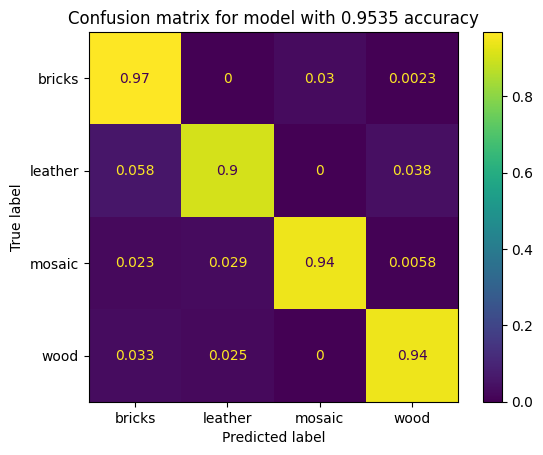

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

acc = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

print(
    f"Accuracy: {acc:.4f} with set size of {df.shape[0]} samples and {TEST_SIZE} test ratio"
)
cm = confusion_matrix(y_test.argmax(
    axis=1), y_pred.argmax(axis=1), normalize="true")
disp = ConfusionMatrixDisplay(
    cm,
    display_labels=df["kind"].unique(),
)
_ = disp.plot().ax_.set_title(
    f"Confusion matrix for model with {acc:.4f} accuracy")